<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Modelo
---





Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia da atriz **Kate Beckinsale**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [5]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://rfsampaio.github.io/docs/the_adventures_of_sherlock_holmes_inc.txt'):
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina '
    texto[i] = texto[i].replace('\"','') # elimina "
    texto[i] = texto[i].replace('“','')
    texto[i] = texto[i].replace('”','')
    texto[i] = texto[i].replace('’','')
    texto[i] = texto[i].replace('_','')
    texto[i] = texto[i].replace('!','')
    texto[i] = texto[i].replace('-','')
    


# Construção do Dicionário

In [6]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
  # print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

# quantidade de palavras no dicionário
# print(len(mydict.keys()))

# print(mydict)

# ordenar, de forma decrescente, as palavras do dicionário pelo valor
sortedmydict = sorted(mydict.items(), key=lambda x: x[1], reverse=True)

print(sortedmydict)

[('the', 444), ('i', 258), ('and', 253), ('to', 245), ('of', 237), ('a', 225), ('in', 156), ('it', 153), ('you', 127), ('was', 123), ('he', 108), ('his', 105), ('that', 103), ('is', 86), ('my', 78), ('she', 71), ('with', 68), ('have', 62), ('at', 62), ('had', 61), ('not', 60), ('as', 60), ('be', 57), ('which', 55), ('but', 53), ('holmes', 48), ('her', 48), ('for', 46), ('me', 46), ('from', 45), ('your', 38), ('then', 35), ('we', 35), ('will', 34), ('this', 33), ('by', 32), ('there', 32), ('an', 32), ('said', 32), ('up', 31), ('when', 31), ('what', 31), ('into', 30), ('who', 30), ('been', 29), ('on', 29), ('do', 29), ('all', 28), ('one', 27), ('out', 27), ('were', 26), ('upon', 25), ('if', 25), ('could', 25), ('are', 25), ('him', 24), ('am', 23), ('man', 22), ('so', 22), ('very', 22), ('down', 22), ('has', 21), ('or', 21), ('may', 21), ('photograph', 21), ('would', 20), ('how', 20), ('own', 18), ('street', 18), ('know', 18), ('now', 17), ('must', 17), ('they', 16), ('more', 16), ('no', 

# Exibição dos Resultados

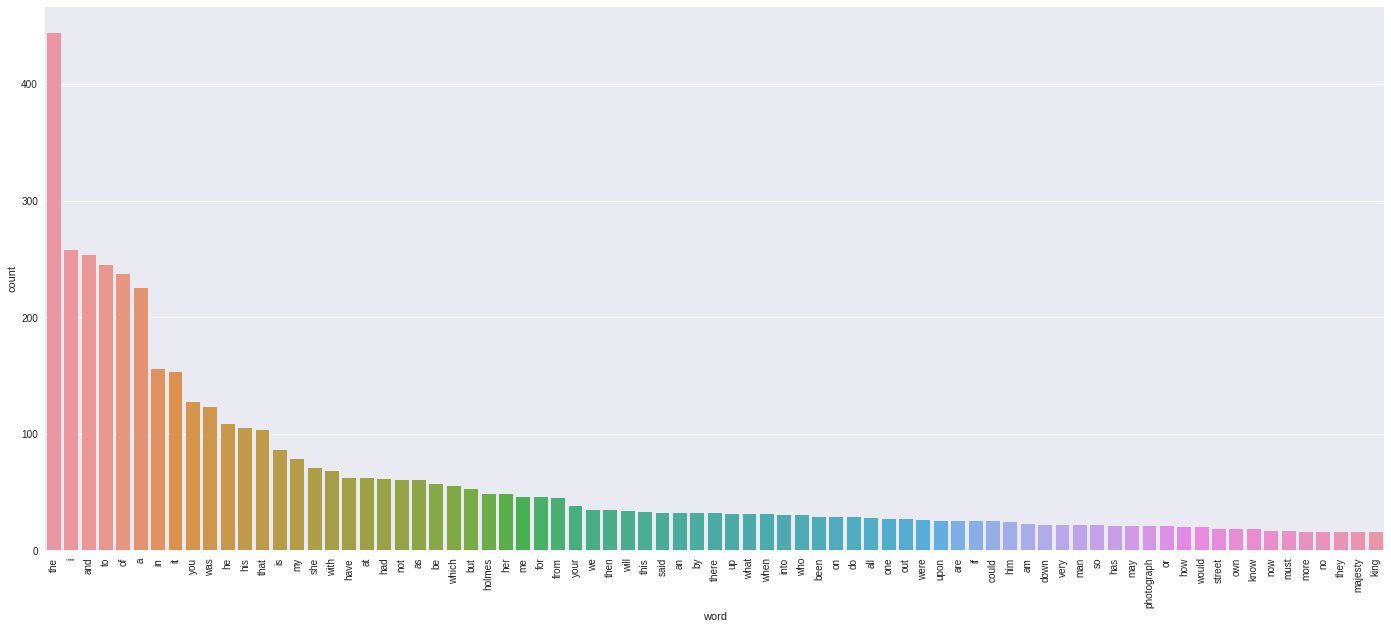

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 15] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()